# Data system statistics - general
This jupyter notebook contains summary statistics relating to data system use within the LifeWatch project.

In [1]:
# Load necessary libraries and functions
#!conda install --yes pandas
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Specify location of data:
datafile = "LW_datasystems_stand.csv"
datafolder = "LW_data_systems_standardized" 
# Load data
data_loc = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir)), datafolder, datafile)
data = pd.read_csv(data_loc)
data.rename(columns={'SortDate': 'Year'}, inplace=True)
#print(data.columns)

In [3]:
# Select usefull data - for general overview
data_affil = data[['DataSystem','Affiliation', 'stand_affil', 'stand_country', 'stand_flemish', 'stand_GROUP', 'stand_QH']]

In [4]:
#summary of dataframe (the number of rows with info for the specific column):
data_affil_summ = data_affil.describe()
data_affil_summ

,DataSystem,Affiliation,stand_affil,stand_country,stand_flemish,stand_GROUP,stand_QH
count,737,735,711,615,140,615,615
unique,3,553,469,50,2,20,4
top,Marine_species,VLIZ,VLIZ Flanders Marine Institute,Belgium,x,Research institute,Science
freq,363,49,49,144,120,205,422


In [5]:
# count of data systems:
data_affil_count = data_affil.groupby('DataSystem').count()
data_affil_count

,Affiliation,stand_affil,stand_country,stand_flemish,stand_GROUP,stand_QH
DataSystem,,,,,,
Mailing_List,200,200,157,133,157,157
Marine_regions,174,155,142,4,142,142
Marine_species,361,356,316,3,316,316


In [6]:
# data completeness of standardized rows:
standaffil_data = data[['Affiliation', 'stand_affil', 'stand_country', 'stand_flemish', 'stand_GROUP', 'stand_QH']]

In [7]:
# Absolute count:
stand_data_count = standaffil_data.describe().iloc[0]
stand_data_count

Affiliation      735
stand_affil      711
stand_country    615
stand_flemish    140
stand_GROUP      615
stand_QH         615
Name: count, dtype: object

In [8]:
# Percentage:
stand_data_perc = stand_data_count.divide(stand_data_count.Affiliation, axis=0).multiply(100)
stand_data_perc

Affiliation          100.0
stand_affil      96.734694
stand_country    83.673469
stand_flemish    19.047619
stand_GROUP      83.673469
stand_QH         83.673469
Name: count, dtype: object

In [9]:
### 2. Number of Affiliations per Categorie and Quadruple Helix term:# Summarize:
datas_cat_summ = standaffil_data.groupby(['stand_QH','stand_GROUP'], dropna=True, as_index=True).nunique('stand_affil').sort_values('stand_affil', ascending=False)
datas_cat_summ

Affiliation  stand_affil  \
stand_QH      stand_GROUP                                          
Science       Research institute                107           90   
              University                         94           82   
Industry      Company                            52           51   
Science       Data infrastructure                55           49   
Policy        Governmental body                  47           40   
Science       Museum                             35           29   
Industry      Consultancy                        19           19   
Civil society Non-profit organization            21           18   
              Other                               9            8   
              Creative body                       7            7   
Policy        Other public authorities            7            7   
              UN organization                     5            5   
              Intergovernmental body              4            4   
Science       Research network                    3            3   
Policy        EU institution                      3            3   
Science       research network                    2            2   
Civil society NGO                                 2            2   
Policy        Defence                             2            2   
Science       International programme             1            1   
              Creative body                       1            1   
              Research Institute                  1            1   
Policy        Company                             1            1   
              Non-profit organization             1            1   

                                        stand_country  stand_flemish  
stand_QH      stand_GROUP                                             
Science       Research institute                   31              2  
              University                           28              2  
Industry      Company                              17              1  
Science       Data infrastructure                  13              1  
Policy        Governmental body                    19              2  
Science       Museum                               13              2  
Industry      Consultancy                          11              0  
Civil society Non-profit organization               7              2  
              Other                                 6              1  
              Creative body                         4              0  
Policy        Other public authorities              6              1  
              UN organization                       1              0  
              Intergovernmental body                2              0  
Science       Research network                      1              0  
Policy        EU institution                        1              0  
Science       research network                      2              0  
Civil society NGO                                   2              0  
Policy        Defence                               2              1  
Science       International programme               1              0  
              Creative body                         1              0  
              Research Institute                    1              0  
Policy        Company                               1              0  
              Non-profit organization               1              0

In [10]:
# write to csv
datas_cat_summ.to_csv('Affiliation_datas_summary.csv', encoding='utf-8')

### 3. Number of Global, Belgian and Flemish affiliations: 
With the corresponding number of data system users

#### Number of Affiliations worldwide:

In [17]:
# Select & Rename necessary columns:
data = data.rename(columns={'stand_affil': 'Standardized_Affiliation'})
data_country = data[['Affiliation', 'DataSystem', 'Standardized_Affiliation', 'stand_country', 'stand_flemish']]
data_country = data_country[data_country['stand_country'].notna()]

In [18]:
data_country_summ = data_country.groupby(['stand_country'], dropna=False, as_index=True).nunique('Standardized_Affiliation').sort_values('Standardized_Affiliation', ascending=False)
data_country_summ

,Affiliation,DataSystem,Standardized_Affiliation,stand_flemish
stand_country,,,,
USA,97,2,84,0
Global,62,3,57,0
UK,49,3,43,0
Belgium,41,3,37,2
Europe,19,3,19,0
France,22,2,19,0
Germany,20,2,18,0
Australia,16,3,15,0
Canada,17,2,14,0


In [13]:
data_country_summ.to_csv('Affiliation_datas_country_summary.csv', encoding='utf-8')

Text(0.5, 0, 'Data System users')

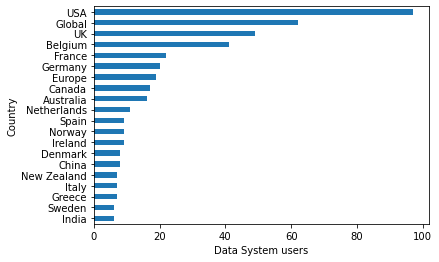

In [19]:
data_country_summ['Affiliation'].nlargest(20).sort_values(ascending=True).plot.barh()
plt.ylabel('Country')
plt.xlabel('Data System users')

#### Number of Belgian affiliations:

In [20]:
data_bel = data[ data['stand_country'] == 'Belgium']
data_bel = data_bel[['Affiliation', 'DataSystem', 'Standardized_Affiliation', 'stand_flemish', 'stand_GROUP', 'stand_QH']]
data_bel

,Affiliation,DataSystem,Standardized_Affiliation,stand_flemish,stand_GROUP,stand_QH
161,ILVO,Marine_species,ILVO Flanders Research Institute for Agricultu...,x,Research institute,Science
237,Universiteit Gent,Marine_species,Ghent University,x,University,Science
254,Missouri Botanical Garden,Marine_species,Plantentuin Meise,x,Museum,Science
399,ILVO,Marine_regions,ILVO Flanders Research Institute for Agricultu...,x,Research institute,Science
420,Free University of Brussels,Marine_regions,Free University of Brussels (VUB),o,University,Science
...,...,...,...,...,...,...
730,"Uantwerpen, Department of Biology, Behavioural...",Mailing_List,University of Antwerp - Faculty of Science - D...,x,University,Science
731,VLIZ,Mailing_List,VLIZ Flanders Marine Institute,x,Research institute,Science
732,Institute of Tropical Medicine Antwerp,Mailing_List,Institute of Tropical Medicine Antwerp,x,Research institute,Science
733,"Ugent, Faculty of Sciences, Departement of Bio...",Mailing_List,Ghent University - Faculty of Sciences - Biolo...,x,Research institute,Science


In [21]:
data_bel.to_csv('Affiliation_datas_BE.csv', encoding='utf-8')

In [22]:
data_bel_count = data_bel.count()
data_bel_count

Affiliation                 144
DataSystem                  144
Standardized_Affiliation    144
stand_flemish               140
stand_GROUP                 144
stand_QH                    144
dtype: int64

In [23]:
data_bel_summ = data_bel.groupby(['stand_QH', 'stand_GROUP'], dropna=False, as_index=True).nunique('Standardized_Affiliation').sort_values('Standardized_Affiliation', ascending=False)
data_bel_summ

Affiliation  DataSystem  \
stand_QH      stand_GROUP                                         
Science       Research institute                 15           3   
Policy        Governmental body                   7           1   
Science       University                          6           3   
Civil society Non-profit organization             5           2   
Science       Museum                              3           2   
Civil society Other                               1           1   
Industry      Company                             1           1   
Policy        Defence                             1           1   
              Other public authorities            1           1   
Science       Data infrastructure                 1           1   

                                        Standardized_Affiliation  \
stand_QH      stand_GROUP                                          
Science       Research institute                              14   
Policy        Governmental body                                7   
Science       University                                       5   
Civil society Non-profit organization                          4   
Science       Museum                                           2   
Civil society Other                                            1   
Industry      Company                                          1   
Policy        Defence                                          1   
              Other public authorities                         1   
Science       Data infrastructure                              1   

                                        stand_flemish  
stand_QH      stand_GROUP                              
Science       Research institute                    2  
Policy        Governmental body                     2  
Science       University                            2  
Civil society Non-profit organization               2  
Science       Museum                                2  
Civil society Other                                 1  
Industry      Company                               1  
Policy        Defence                               1  
              Other public authorities              1  
Science       Data infrastructure                   1

In [24]:
data_bel_summ.to_csv('Affiliation_datas_BE_summary.csv', encoding='utf-8')

#### Number of Flemish affiliations:

In [25]:
data_flem = data[ data['stand_flemish'] == 'x']
data_flem = data_flem[['Affiliation', 'DataSystem', 'Standardized_Affiliation', 'stand_flemish', 'stand_GROUP', 'stand_QH']]
data_flem

,Affiliation,DataSystem,Standardized_Affiliation,stand_flemish,stand_GROUP,stand_QH
161,ILVO,Marine_species,ILVO Flanders Research Institute for Agricultu...,x,Research institute,Science
237,Universiteit Gent,Marine_species,Ghent University,x,University,Science
254,Missouri Botanical Garden,Marine_species,Plantentuin Meise,x,Museum,Science
399,ILVO,Marine_regions,ILVO Flanders Research Institute for Agricultu...,x,Research institute,Science
422,Ghent University,Marine_regions,Ghent University,x,University,Science
...,...,...,...,...,...,...
730,"Uantwerpen, Department of Biology, Behavioural...",Mailing_List,University of Antwerp - Faculty of Science - D...,x,University,Science
731,VLIZ,Mailing_List,VLIZ Flanders Marine Institute,x,Research institute,Science
732,Institute of Tropical Medicine Antwerp,Mailing_List,Institute of Tropical Medicine Antwerp,x,Research institute,Science
733,"Ugent, Faculty of Sciences, Departement of Bio...",Mailing_List,Ghent University - Faculty of Sciences - Biolo...,x,Research institute,Science


In [26]:
data_flem.to_csv('Affiliation_datas_FL.csv', encoding='utf-8')

In [27]:
data_flem_count = data_flem.count()
data_flem_count

Affiliation                 120
DataSystem                  120
Standardized_Affiliation    120
stand_flemish               120
stand_GROUP                 120
stand_QH                    120
dtype: int64

In [28]:
data_flem_summ = data_flem.groupby(['stand_QH', 'stand_GROUP'], dropna=False, as_index=True).nunique('Standardized_Affiliation').sort_values('Standardized_Affiliation', ascending=False)
data_flem_summ

Affiliation  DataSystem  \
stand_QH      stand_GROUP                                         
Science       Research institute                 12           3   
              University                          5           3   
Policy        Governmental body                   3           1   
Civil society Non-profit organization             2           1   
Industry      Company                             1           1   
Policy        Other public authorities            1           1   
Science       Museum                              2           2   

                                        Standardized_Affiliation  \
stand_QH      stand_GROUP                                          
Science       Research institute                              11   
              University                                       4   
Policy        Governmental body                                3   
Civil society Non-profit organization                          2   
Industry      Company                                          1   
Policy        Other public authorities                         1   
Science       Museum                                           1   

                                        stand_flemish  
stand_QH      stand_GROUP                              
Science       Research institute                    1  
              University                            1  
Policy        Governmental body                     1  
Civil society Non-profit organization               1  
Industry      Company                               1  
Policy        Other public authorities              1  
Science       Museum                                1

In [29]:
data_flem_summ.to_csv('Affiliation_datas_FL_summary.csv', encoding='utf-8')